C:\Users\pc\AppData\Local\Temp\ipykernel_30712\2741669868.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframes = {name: pd.read_sql(query, conn) for name, query in queries.items()}
C:\Users\pc\AppData\Local\Temp\ipykernel_30712\2741669868.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframes = {name: pd.read_sql(query, conn) for name, query in queries.items()}
C:\Users\pc\AppData\Local\Temp\ipykernel_30712\2741669868.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframes = {name: pd.read_sql(qu

Users Data:
   id                                           password  \
0   4  pbkdf2_sha256$870000$fLBLx75u798D48q96kt4pS$ZL...   
1   5  pbkdf2_sha256$870000$WBp5PtNVSPCVphnaUwwhMo$H+...   
2   6  pbkdf2_sha256$870000$bRXj0UdYl39Z4UQb5JypT7$Td...   

                        last_login  is_superuser  username first_name  \
0 2024-11-17 18:42:51.913203+00:00         False  Honorine              
1 2024-11-17 18:43:58.757471+00:00         False     Peace              
2 2024-11-19 12:29:06.946031+00:00         False      Ange              

  last_name                         email  is_staff  is_active  \
0            honorineuwineza077@gmail.com     False       True   
1                     kayumbaj8@gmail.com     False       True   
2                          ange@gmail.com     False       True   

                       date_joined   role             profile_image  
0 2024-11-15 18:33:09.824947+00:00  admin  profile_images/hono2.jpg  
1 2024-11-17 18:43:57.467156+00:00  coach        

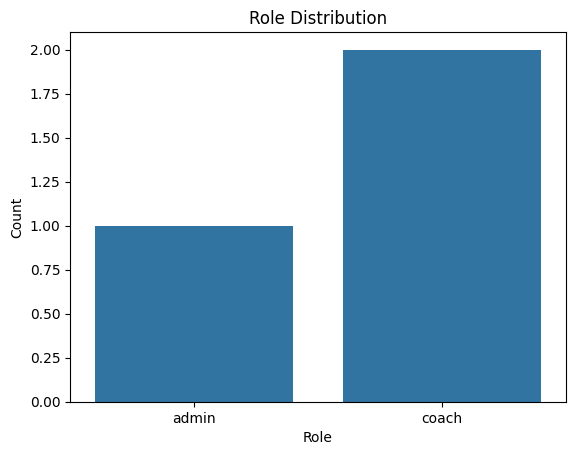

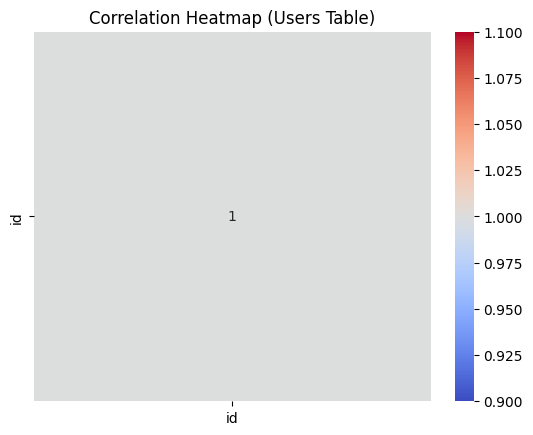

In [13]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Database connection parameters
db_params = {
    'host': 'localhost',
    'database': 'sportdb',
    'user': 'postgres',
    'password': 'kayumba@'
}

# Establishing the connection
conn = psycopg2.connect(**db_params)

# Queries to fetch data
queries = {
    "users": "SELECT * FROM users;",
    "leagues": "SELECT * FROM leagues;",
    "teams": "SELECT * FROM teams;"
}

# Load data into Pandas DataFrames
dataframes = {name: pd.read_sql(query, conn) for name, query in queries.items()}

# Close the connection
conn.close()

# Access DataFrames
users_df = dataframes["users"]
leagues_df = dataframes["leagues"]
teams_df = dataframes["teams"]

# Display first few rows
print("Users Data:")
print(users_df.head(), "\n")

print("Leagues Data:")
print(leagues_df.head(), "\n")

print("Teams Data:")
print(teams_df.head(), "\n")

# EDA Functions
def overview(df, name):
    print(f"Overview of {name}:\n")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum(), "\n")
    print("Duplicate Rows:", df.duplicated().sum(), "\n")
    print("Data Types:\n", df.dtypes, "\n")
    print("Statistical Summary:\n", df.describe(include='all'), "\n")

# Perform EDA on all DataFrames
for name, df in dataframes.items():
    overview(df, name)


# 2. Countplot for a categorical column (replace 'role' with a relevant column in users_df)
sns.countplot(data=users_df, x='role')
plt.title("Role Distribution")
plt.xlabel("Role")
plt.ylabel("Count")
plt.show()



# 5. Heatmap for correlations in users_df
corr = users_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Users Table)")
plt.show()

